In [245]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [246]:
# Dataset Import and Preprocessing
file_path = '/content/smart_logistics_dataset.csv'  # Ensure the file path is correct
# Load the dataset
df = pd.read_csv(file_path)

In [247]:
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1


In [248]:
# Check for missing values in the dataset
print("\nMissing Values in the Dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values in the Dataset:
Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64


In [249]:
# Handle missing values in numerical columns using mean imputation
numerical_cols = df.select_dtypes(include=[np.number]).columns  # Identify numerical columns
imputer_num = SimpleImputer(strategy='mean')  # Impute with mean for numerical columns
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
# After imputation, you can check if there are still any missing values
missing_values_after = df.isnull().sum()
# Display the missing values count after imputation
print("Missing Values After Imputation:\n", missing_values_after)

Missing Values After Imputation:
 Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64


In [250]:
# Set seaborn style for better visualization aesthetics
sns.set(style="whitegrid")

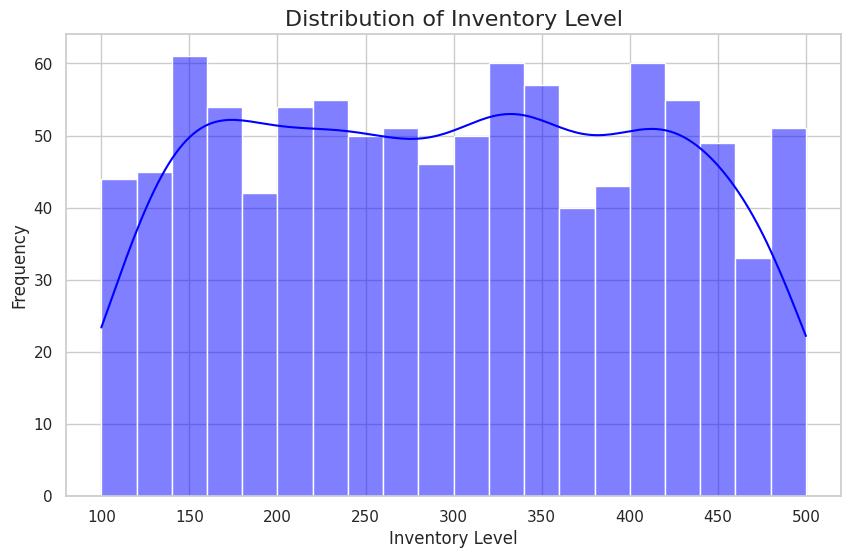

In [251]:
# 1. Histogram for Inventory Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Inventory_Level'], kde=True, color='blue', bins=20)
plt.title('Distribution of Inventory Level', fontsize=16)
plt.xlabel('Inventory Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

/tmp/ipython-input-252-1902405026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Shipment_Status', data=df, palette='viridis')


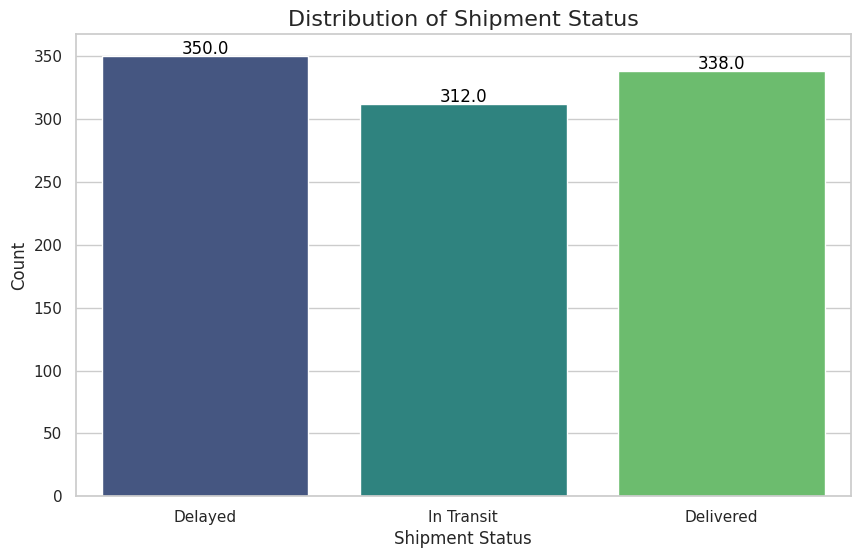

In [252]:
# 2. Bar Plot for Shipment Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Shipment_Status', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of Shipment Status', fontsize=16)
plt.xlabel('Shipment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Display the plot
plt.show()

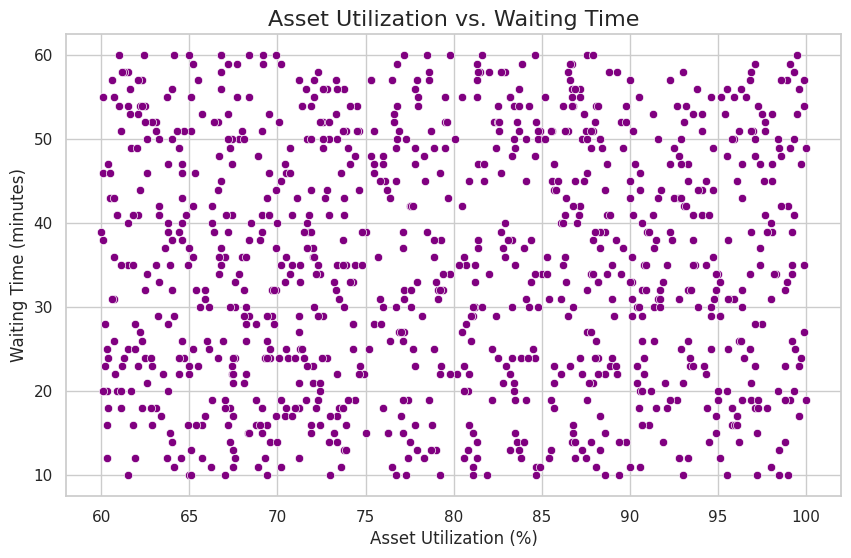

In [253]:
# 3. Scatter Plot for Asset Utilization vs. Waiting Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Asset_Utilization', y='Waiting_Time', data=df, color='purple')
plt.title('Asset Utilization vs. Waiting Time', fontsize=16)
plt.xlabel('Asset Utilization (%)', fontsize=12)
plt.ylabel('Waiting Time (minutes)', fontsize=12)
plt.show()

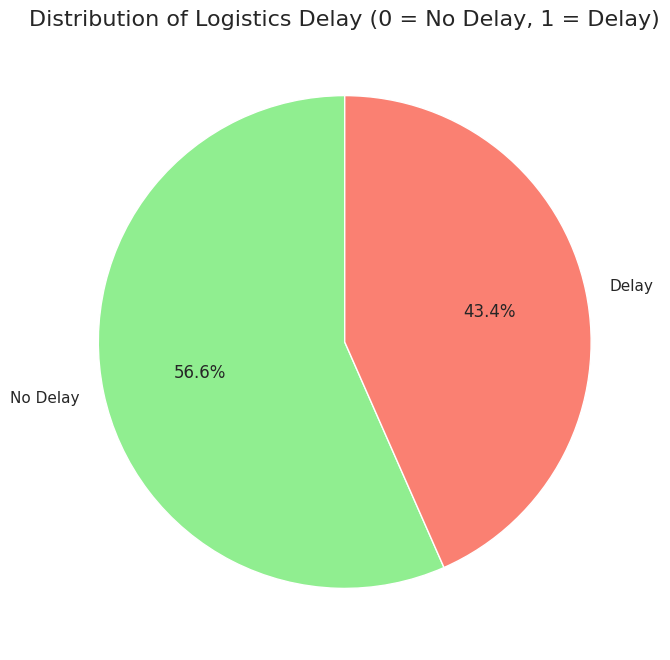

In [254]:
# 4. Pie Chart for Logistics Delay Distribution (1 = Delay, 0 = No Delay)
plt.figure(figsize=(8, 8))
delay_counts = df['Logistics_Delay'].value_counts()
labels = ['No Delay', 'Delay']
colors = ['lightgreen', 'salmon']
plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Logistics Delay (0 = No Delay, 1 = Delay)', fontsize=16)
plt.show()

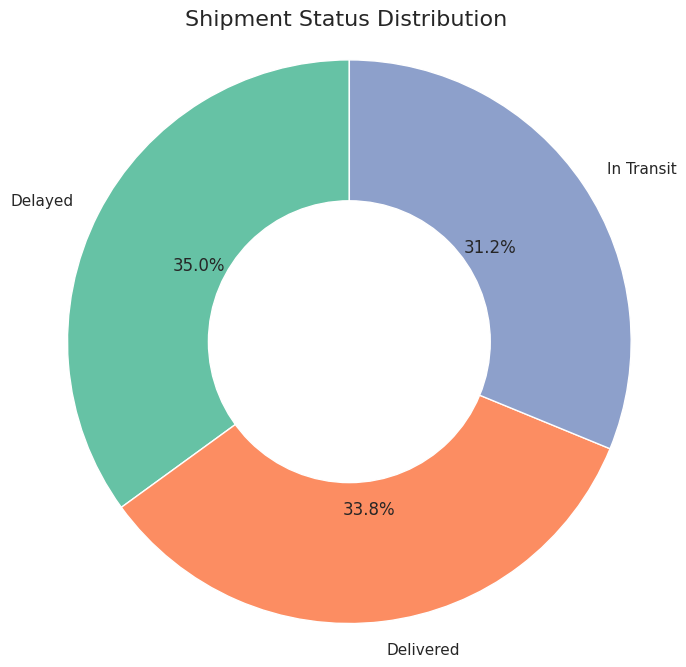

In [255]:
# 5 Doughnut chart for Shipment Status Distribution
plt.figure(figsize=(8, 8))
status_counts = df['Shipment_Status'].value_counts()
# Create a Pie chart and convert it into a doughnut chart by adding a white circle in the center
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
centre_circle = plt.Circle((0, 0), 0.50, color='white', lw=1)
plt.gca().add_artist(centre_circle)
plt.title('Shipment Status Distribution ', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 1200x600 with 0 Axes>

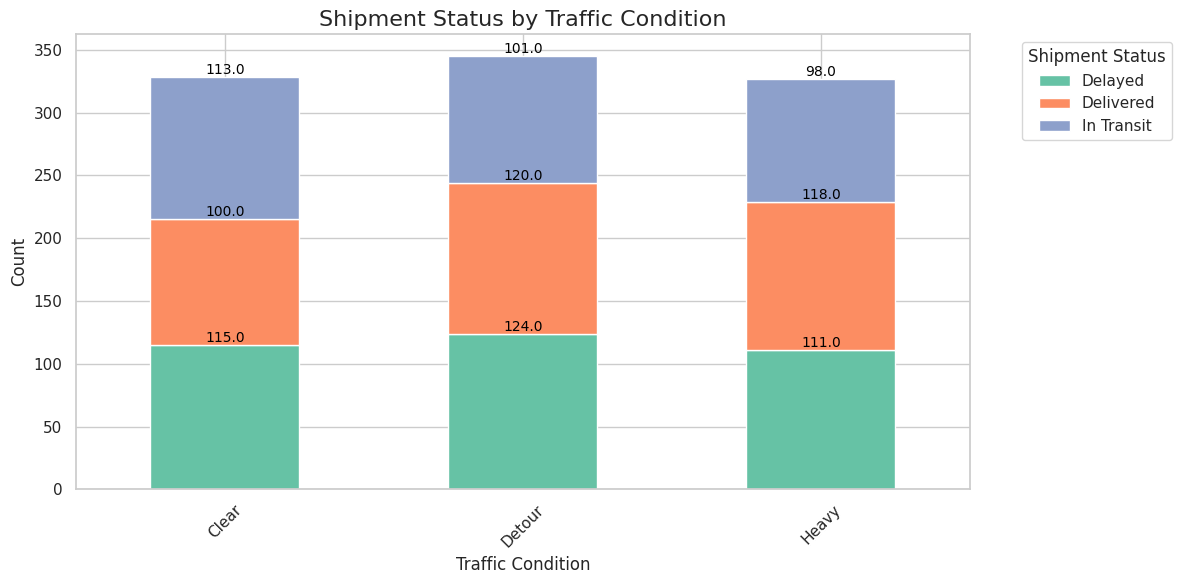

In [256]:
# 6 Stacked Bar Chart for Shipment Status by Traffic Condition
plt.figure(figsize=(12, 6))
# Create a pivot table for the stacked bar chart
traffic_status_pivot = df.pivot_table(index='Traffic_Status', columns='Shipment_Status', aggfunc='size', fill_value=0)
# Plot the stacked bar chart
ax = traffic_status_pivot.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62', '#8da0cb'], figsize=(12, 6))
for p in ax.patches:
    # Get the height of each bar section
    height = p.get_height()
    if height > 0:  # Only annotate bars with a height > 0
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + p.get_y()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')
# Set the title and labels
plt.title('Shipment Status by Traffic Condition', fontsize=16)
plt.xlabel('Traffic Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
# Display the legend and make the layout tight
plt.legend(title='Shipment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Show the plot
plt.show()

In [257]:
# Feature Selection and Target Variable
X = df.drop(columns=['Logistics_Delay', 'Timestamp', 'Asset_ID', 'Latitude', 'Longitude', 'Logistics_Delay_Reason'])  # Drop irrelevant columns
y = df['Logistics_Delay']  # Target variable (Logistics Delay)

In [258]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [259]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)

In [260]:
# Train models
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [261]:
# Predict on the test set
log_reg_pred = log_reg.predict(X_test)

In [262]:
# Generate Classification Reports
log_reg_report = classification_report(y_test, log_reg_pred)
# Print classification reports
print("Logistic Regression Classification Report:\n", log_reg_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [263]:
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
log_reg_roc_auc = roc_auc_score(y_test, log_reg_prob)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_prob)

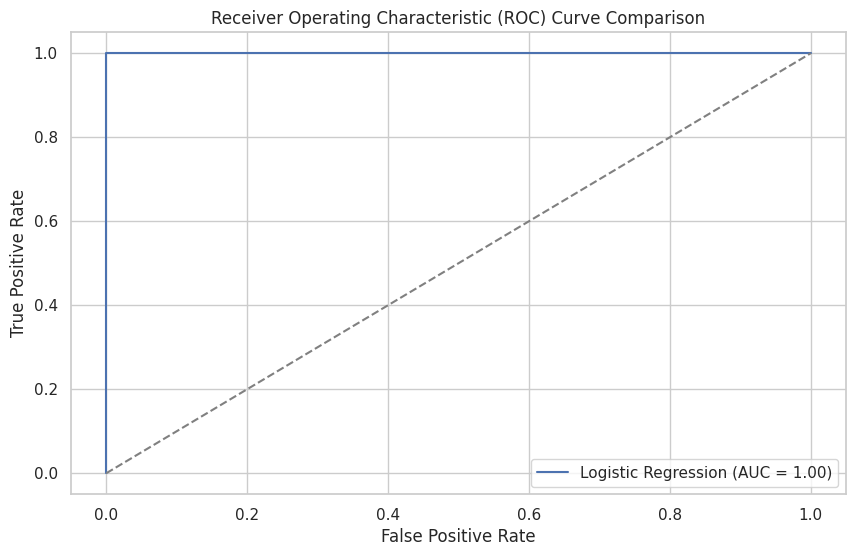

In [264]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

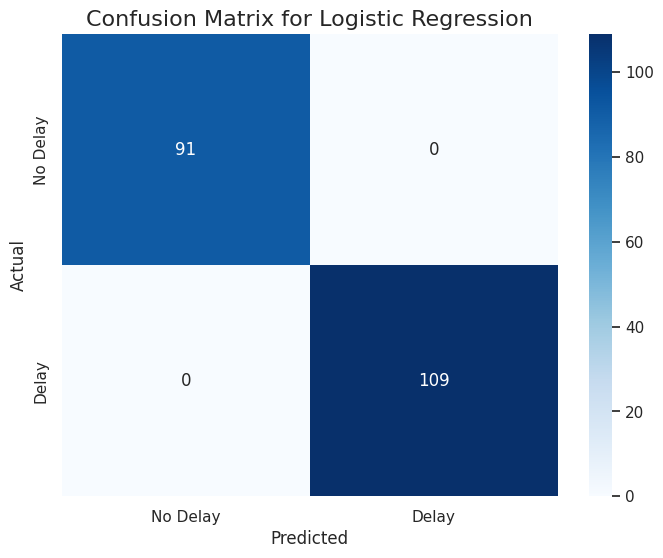

In [265]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

# **Logistic Regression**
log_reg_pred = log_reg.predict(X_test)
plot_confusion_matrix(y_test, log_reg_pred, 'Logistic Regression')

# **Random Forest Classifier**

In [266]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [267]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [268]:
rf_clf_pred = rf_clf.predict(X_test)

In [269]:
rf_clf_report = classification_report(y_test, rf_clf_pred)
print("Random Forest Classification Report:\n", rf_clf_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [270]:
rf_clf_prob = rf_clf.predict_proba(X_test)[:, 1]
rf_clf_roc_auc = roc_auc_score(y_test, rf_clf_prob)
fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test, rf_clf_prob)

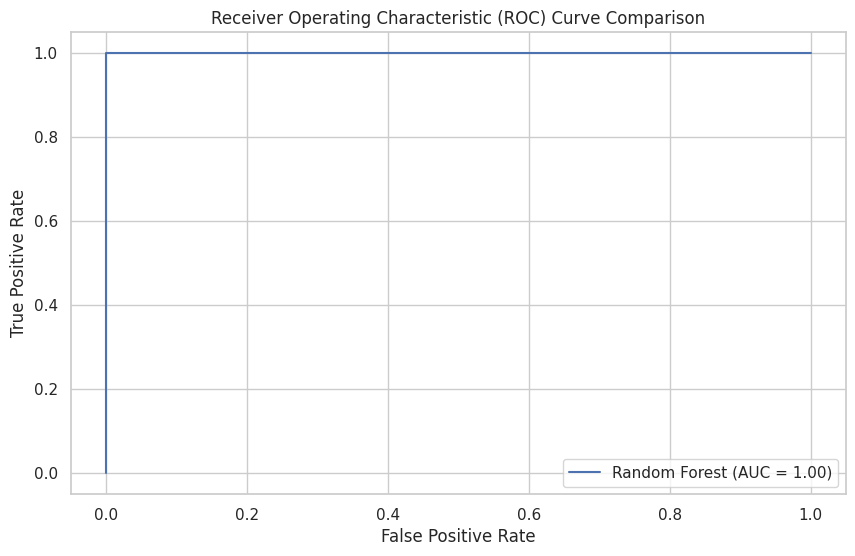

In [271]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_clf, tpr_rf_clf, label=f'Random Forest (AUC = {rf_clf_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

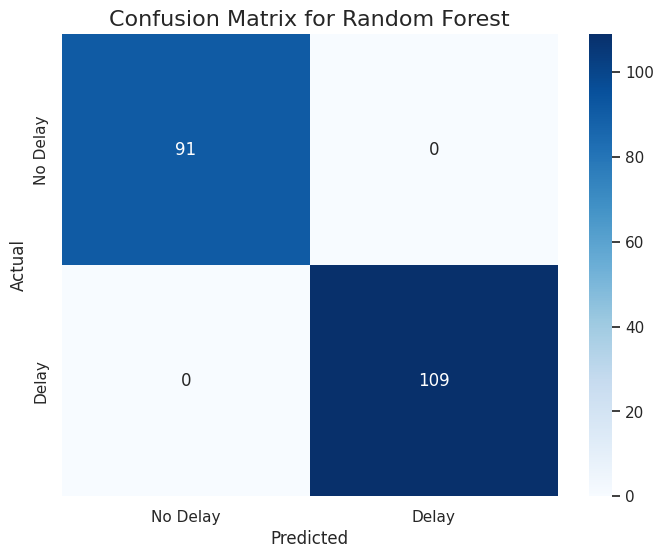

In [272]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()
# **Random Forest**
rf_clf_pred = rf_clf.predict(X_test)
plot_confusion_matrix(y_test, rf_clf_pred, 'Random Forest')

# **XGB Classifier**

In [273]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [274]:
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:46:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [275]:
xgb_clf_pred = xgb_clf.predict(X_test)

In [276]:
xgb_clf_report = classification_report(y_test, xgb_clf_pred)

In [277]:
print("XGBoost Classification Report:\n", xgb_clf_report)

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [278]:
xgb_clf_prob = xgb_clf.predict_proba(X_test)[:, 1]
xgb_clf_roc_auc = roc_auc_score(y_test, xgb_clf_prob)
fpr_xgb_clf, tpr_xgb_clf, _ = roc_curve(y_test, xgb_clf_prob)

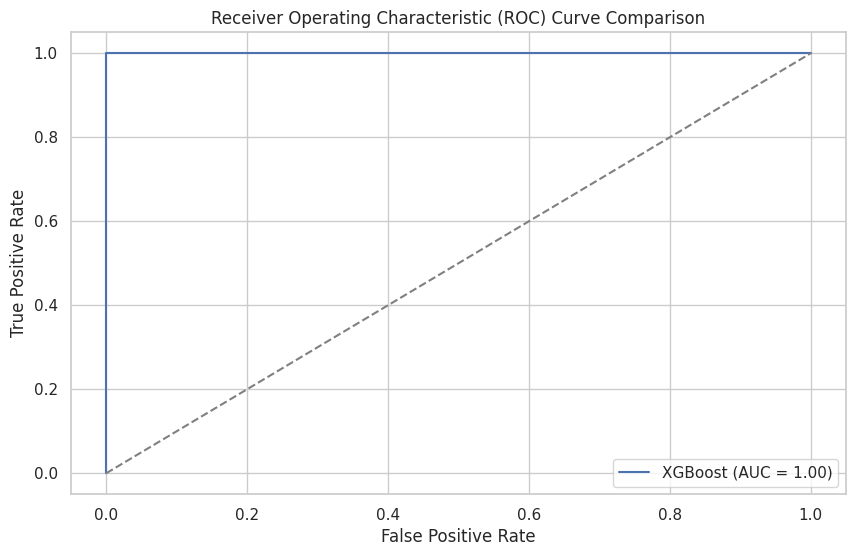

In [279]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb_clf, tpr_xgb_clf, label=f'XGBoost (AUC = {xgb_clf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

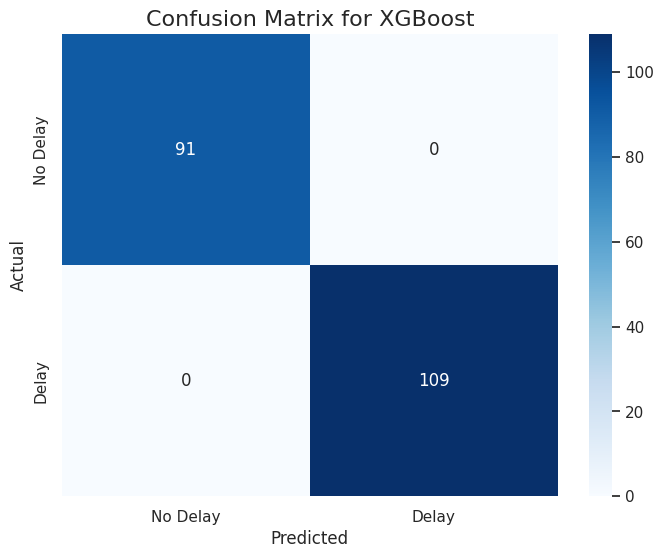

In [280]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()
# **XGBoost**
xgb_clf_pred = xgb_clf.predict(X_test)
plot_confusion_matrix(y_test, xgb_clf_pred, 'XGBoost')

# **Support Vector Classifier**

In [281]:
svm_clf = SVC(probability=True, kernel='linear')

In [282]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [283]:
svm_clf_pred = svm_clf.predict(X_test)

In [284]:
svm_clf_report = classification_report(y_test, svm_clf_pred)
print("Support Vector Machine Classification Report:\n", svm_clf_report)

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [285]:
svm_clf_prob = svm_clf.predict_proba(X_test)[:, 1]
svm_clf_roc_auc = roc_auc_score(y_test, svm_clf_prob)
fpr_svm_clf, tpr_svm_clf, _ = roc_curve(y_test, svm_clf_prob)

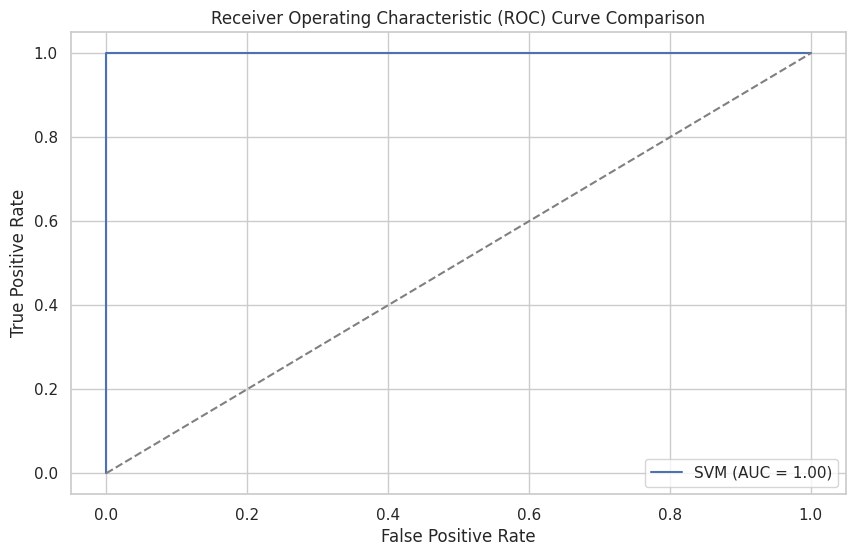

In [286]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm_clf, tpr_svm_clf, label=f'SVM (AUC = {svm_clf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

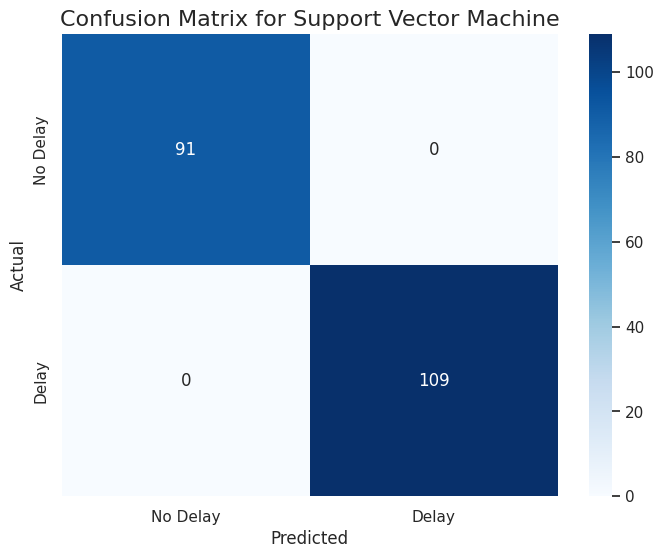

In [287]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()
# **Support Vector Machine (SVM)**
svm_clf_pred = svm_clf.predict(X_test)
plot_confusion_matrix(y_test, svm_clf_pred, 'Support Vector Machine')

In [288]:
# Feature selection (excluding target variable and non-numeric columns)
X_unsupervised = df.drop(columns=['Logistics_Delay', 'Timestamp', 'Asset_ID', 'Latitude', 'Longitude', 'Logistics_Delay_Reason'])

# Handle categorical variables with One-Hot Encoding
X_unsupervised_encoded = pd.get_dummies(X_unsupervised, drop_first=True)  # One-hot encode categorical variables

In [289]:
# Standardizing the features for K-Means and PCA (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised_encoded)

# **K Means Clustering**

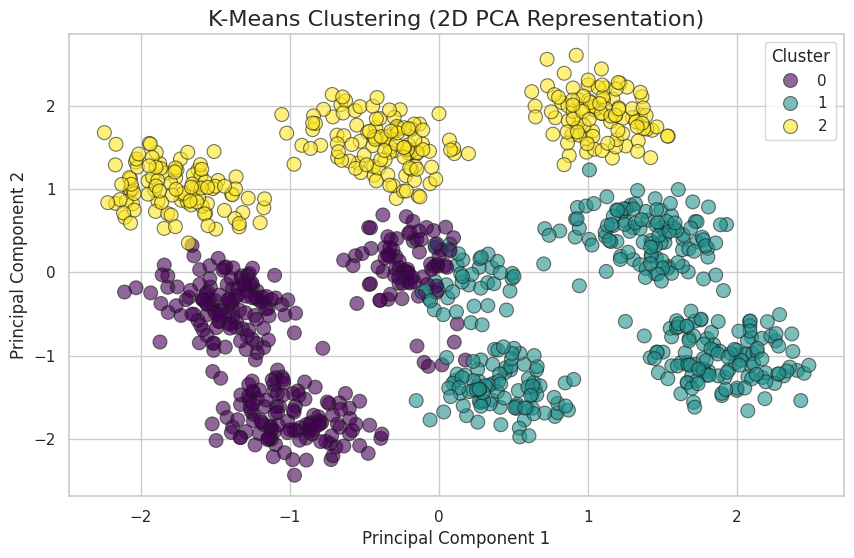

Silhouette Score for K-Means Clustering: 0.10


In [290]:
# Initialize the KMeans model with 3 clusters (you can experiment with the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
df['KMeans_Cluster'] = kmeans.labels_

# 2. PCA for 2D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in a 2D space (using the first two principal components)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='k')
plt.title('K-Means Clustering (2D PCA Representation)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

# 3. Silhouette Score Calculation
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg:.2f}")


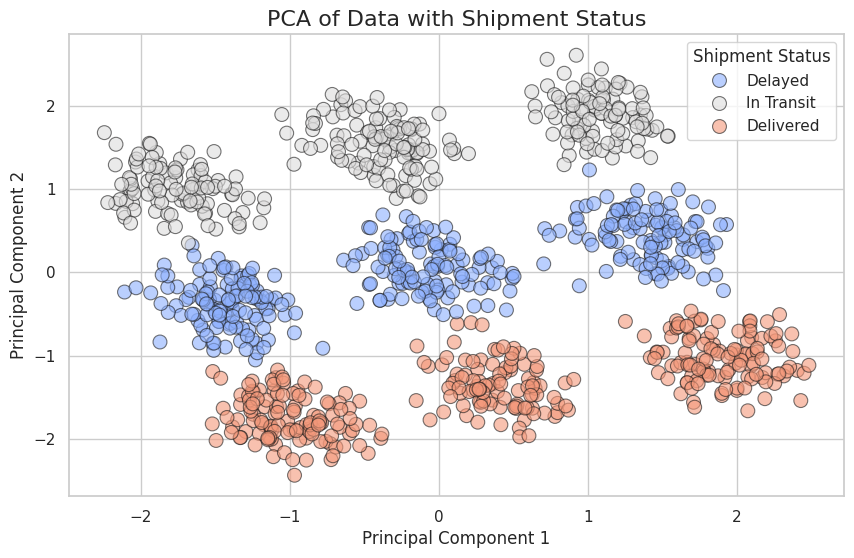

In [291]:
# 2. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Visualize the data in 2D after PCA transformation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Shipment_Status'], palette='coolwarm', s=100, alpha=0.6, edgecolor='k')
plt.title('PCA of Data with Shipment Status', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Shipment Status', loc='upper right')
plt.show()

# **DBSCAN clustering**

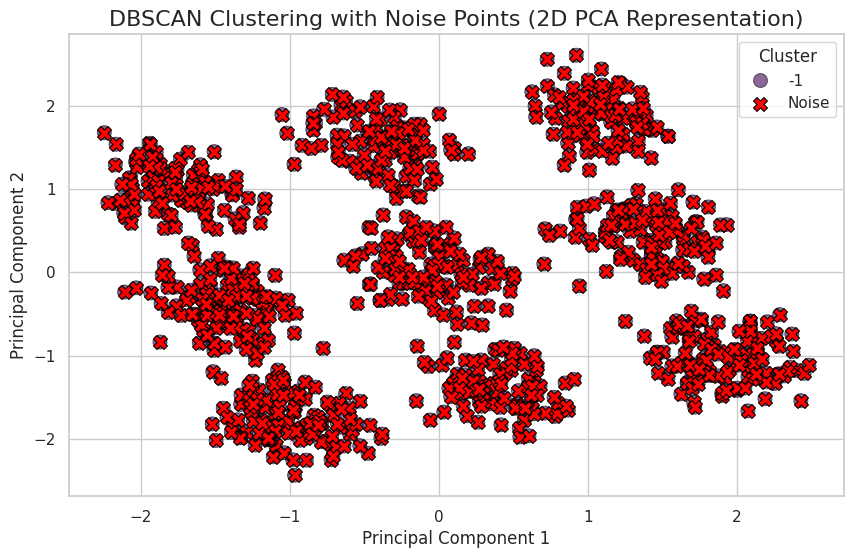

Number of noise points: 1000


In [292]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)  # Fit DBSCAN to the scaled data

# Visualizing the clusters and noise points
plt.figure(figsize=(10, 6))

# Create PCA for 2D visualization of the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot for DBSCAN clustering (showing clusters and noise points)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='k')

# Color noise points differently (DBSCAN labels noise points as -1)
sns.scatterplot(x=X_pca[df['DBSCAN_Cluster'] == -1][:, 0],
                y=X_pca[df['DBSCAN_Cluster'] == -1][:, 1],
                color='red', label='Noise', s=100, marker='X', edgecolor='black')

# Add title and labels
plt.title('DBSCAN Clustering with Noise Points (2D PCA Representation)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')

# Display the plot
plt.show()

# Checking the number of noise points (those assigned to cluster -1)
noise_points = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")